In [182]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
import pandas as pd
from scipy.stats import multivariate_normal
import seaborn as sns
plt.style.use('ggplot')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix

random_state = 42

## Data Loading

In [183]:
#training data
train_df = pd.read_csv('tr_server_data.csv')
print('data shape', train_df.shape)
train_df.head()

data shape (307, 2)


,Latency,Throughput
0,13.047,14.741
1,13.409,13.763
2,14.196,15.853
3,14.915,16.174
4,13.577,14.043


In [184]:
# CV data: the data used for calculation purpose. 
cv_df = pd.read_csv('cv_server_data.csv')
print('data shape', cv_df.shape)
cv_df.head()

data shape (307, 2)


,Latency,Throughput
0,15.790,14.921
1,13.640,15.330
2,14.866,16.474
3,13.585,13.989
4,13.464,15.635


In [185]:
# CV data results 0 for normal 1 for outlier. 
result_df = pd.read_csv('gt_server_data.csv')
print('data shape', result_df.shape)
result_df.head()

data shape (307, 1)


,results
0,0
1,0
2,0
3,0
4,0


In [186]:
result_df['results'].value_counts()

0    298
1      9
Name: results, dtype: int64

### Test Data

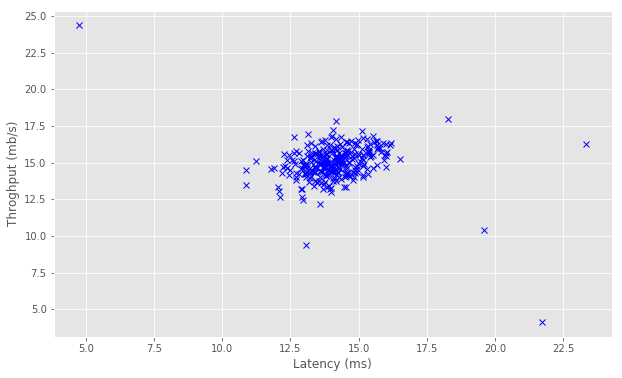

In [221]:
plt.figure(figsize= (10,6))
plt.plot(train_df['Latency'], train_df['Throughput'], 'bx' )
plt.xlabel('Latency (ms)')
plt.ylabel('Throghput (mb/s)')
plt.show()

### Training data

(298, 2)


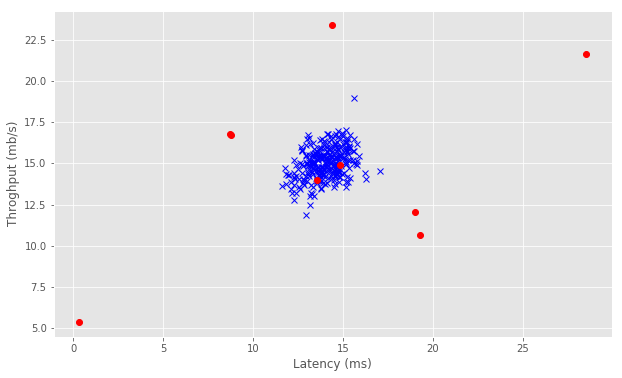

In [223]:
normal = cv_df.iloc[result_df.index[result_df['results'] == 0]]
print(normal.shape)
abnormal = cv_df.iloc[result_df.index[result_df['results'] == 1]]
plt.figure(figsize= (10,6))
plt.plot(normal['Latency'], normal['Throughput'], 'bx' )
plt.plot(abnormal['Latency'], abnormal['Throughput'], 'ro' )
plt.xlabel('Latency (ms)')
plt.ylabel('Throghput (mb/s)')
plt.show()# 


### Using Support Vector Machine
We will only used Test data so that SVM find the outliers without any cross calidation data (Unsupervised Learning)

In [188]:
#Here nu reperesent the fraction of data that are outliers
clf = svm.OneClassSVM(nu = 0.02, kernel = 'rbf', gamma = 0.01)
clf.fit(train_df)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.01, kernel='rbf',
      max_iter=-1, nu=0.02, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [189]:
pred = clf.predict(train_df)



In [190]:
#1 means normal, -1 means abnormal
normal = train_df[pred == 1]
abnormal = train_df[pred == -1]


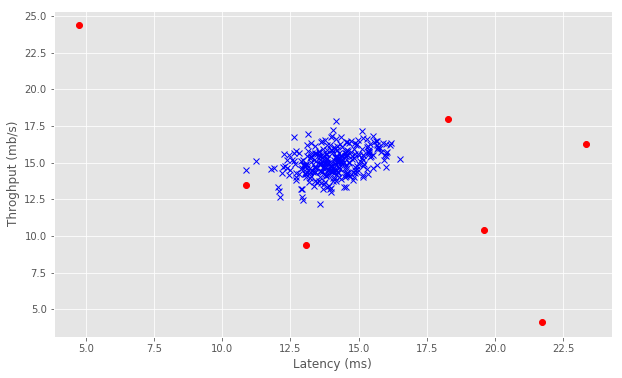

In [191]:
plt.figure(figsize= (10,6))
plt.plot(normal['Latency'], normal['Throughput'], 'bx' )
plt.plot(abnormal['Latency'], abnormal['Throughput'], 'ro' )
plt.xlabel('Latency (ms)')
plt.ylabel('Throghput (mb/s)')
plt.show()

### Using multivariateGaussian

In [192]:
# calculate mean
tr_data = train_df.values
mu = np.mean(tr_data, axis = 0)
mu

array([ 14.11225277,  14.99767459])

In [193]:
# calculate Sigma
sigma = np.cov(tr_data.T)
sigma


array([[ 1.83866684, -0.22783493],
       [-0.22783493,  1.71530264]])

In [194]:
# Get Guassian distribustion for train data
p = multivariate_normal(mean=mu, cov=sigma)
p_tr  = p.pdf(tr_data)
 

In [195]:
# get Guassian distribution for CV data
p = multivariate_normal(mean=mu, cov=sigma)
p_cv = p.pdf(cv_df.values)
p_cv.shape
# sns.distplot(p_cv, hist=False, rug=True)
# plt.show()

(307,)

In [196]:
#Find Thresold
best_epsilon = 0
best_f1 = 0
f = 0
stepsize = (max(p_cv) - min(p_cv)) / 1000;
print('stepsize', stepsize)
epsilons = np.arange(min(p_cv),max(p_cv),stepsize)
print('epsilon',epsilon)
for epsilon in np.nditer(epsilons):
    predictions = (p_cv < epsilon)
    f = f1_score(result_df.values, predictions, average = "binary")
    print('f1 score',f)
    if f > best_f1:
        best_f1 = f
        best_epsilon = epsilon

fscore, ep  = best_f1, best_epsilon     

stepsize 9.03620132798e-05
epsilon 0.0902716512665323
f1 score 0.0
f1 score 0.875
f1 score 0.875
f1 score 0.875
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.823529411765
f1 score 0.777777777778
f1 score 0.777777777778
f1 score 0.777777777778
f1 score 0.777777777778
f1 score 0.777777777778
f1 score 0.777777777778
f1 score 0.777777777778
f1 score 0.777777777778
f1 score 0.777777777778
f1 score 0.777777777778
f1 score 0.777777777778


C:\Users\I056036\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



f1 score 0.56
f1 score 0.56
f1 score 0.56
f1 score 0.56
f1 score 0.56
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461538462
f1 score 0.538461

f1 score 0.122807017544
f1 score 0.122807017544
f1 score 0.122807017544
f1 score 0.122807017544
f1 score 0.122807017544
f1 score 0.122807017544
f1 score 0.122807017544
f1 score 0.122807017544
f1 score 0.122807017544
f1 score 0.122807017544
f1 score 0.121739130435
f1 score 0.121739130435
f1 score 0.121739130435
f1 score 0.120689655172
f1 score 0.120689655172
f1 score 0.120689655172
f1 score 0.120689655172
f1 score 0.119658119658
f1 score 0.119658119658
f1 score 0.119658119658
f1 score 0.118644067797
f1 score 0.118644067797
f1 score 0.118644067797
f1 score 0.117647058824
f1 score 0.117647058824
f1 score 0.116666666667
f1 score 0.116666666667
f1 score 0.115702479339
f1 score 0.114754098361
f1 score 0.114754098361
f1 score 0.113821138211
f1 score 0.113821138211
f1 score 0.113821138211
f1 score 0.113821138211
f1 score 0.113821138211
f1 score 0.113821138211
f1 score 0.112903225806
f1 score 0.112903225806
f1 score 0.112903225806
f1 score 0.112
f1 score 0.111111111111
f1 score 0.110236220472
f

f1 score 0.0625
f1 score 0.0625
f1 score 0.0622837370242
f1 score 0.0622837370242
f1 score 0.0620689655172
f1 score 0.0620689655172
f1 score 0.0616438356164
f1 score 0.0612244897959
f1 score 0.0608108108108
f1 score 0.0608108108108
f1 score 0.0606060606061
f1 score 0.0606060606061
f1 score 0.0606060606061
f1 score 0.0606060606061
f1 score 0.0604026845638
f1 score 0.0604026845638
f1 score 0.0604026845638
f1 score 0.0604026845638
f1 score 0.0604026845638
f1 score 0.0604026845638
f1 score 0.0604026845638
f1 score 0.0602006688963
f1 score 0.0602006688963
f1 score 0.0596026490066
f1 score 0.0596026490066
f1 score 0.0594059405941
f1 score 0.0592105263158
f1 score 0.0592105263158
f1 score 0.0592105263158
f1 score 0.0592105263158
f1 score 0.0592105263158
f1 score 0.0592105263158
f1 score 0.0592105263158
f1 score 0.0592105263158
f1 score 0.0592105263158
f1 score 0.0590163934426
f1 score 0.0588235294118
f1 score 0.0588235294118
f1 score 0.0588235294118
f1 score 0.0586319218241
f1 score 0.0586319

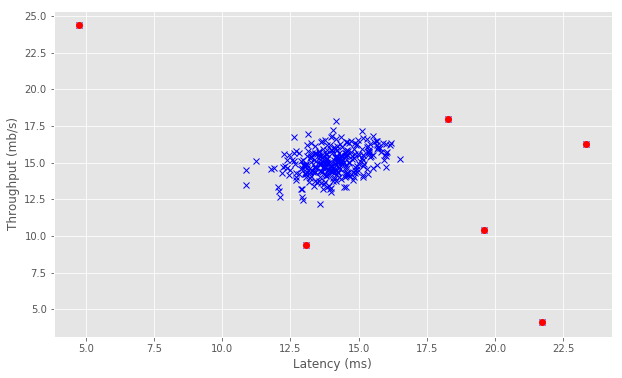

In [197]:
outliers = np.asarray(np.where(p_tr < ep))

plt.figure(figsize= (10,6))
plt.xlabel("Latency (ms)") 
plt.ylabel("Throughput (mb/s)") 
plt.plot(tr_data[:,0],tr_data[:,1],"bx") 
plt.plot(tr_data[outliers,0],tr_data[outliers,1],"ro") 
plt.show()


### Using Supervised Approach

In [281]:
def random_search(clf, param_dist, X, y):
   
    grid_clf = RandomizedSearchCV(clf, 
                             param_distributions = param_dist,
                             cv = 5,  
                             n_iter = 50, 
                             verbose=2,
                             scoring = 'accuracy',  
                             random_state = 42,
                             n_jobs = 4
                             )

    grid_clf.fit(X, y)

    print('Shape', X.shape)
    best_parameters, score, _ = max(grid_clf.grid_scores_, key=lambda x: x[1])
    print('Score:', score)

    for param_name in sorted(best_parameters.keys()):
        print("%s: %r" % (param_name, best_parameters[param_name]))   
        
    return grid_clf.best_estimator_     

In [287]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier( random_state = 42,                            
                           #  class_weight={0:20,1:1}
                            )

param_dist = { 'n_estimators': randint(2, 1000),
              "max_depth": randint(2, 20),         
              "min_samples_split": randint(2, 11),
              "min_samples_leaf":  randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

        


X_train = cv_df.values
y_train = result_df.values.ravel()
X_test = tr_data

#clf = random_search(clf, param_dist, X_train, y_train)  

clf =  RandomForestClassifier(random_state = 42, 
                              max_depth = 6,
                              n_estimators = 412,
                              min_samples_split =2,
                              min_samples_leaf = 1,
                              bootstrap = False, 
                              criterion = 'entropy',
                              class_weight={0:20,1:1}
                               )

y_pred = cross_val_predict(clf, X_train, y_train, cv= 7)
print('CV Accuracy RF Model', accuracy_score(y_train, y_pred))
print('confusion_matrix', confusion_matrix(y_train, y_pred))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)




CV Accuracy RF Model 0.983713355049
confusion_matrix [[297   1]
 [  4   5]]


## Test Data Results

(307, 2)
(301, 2)


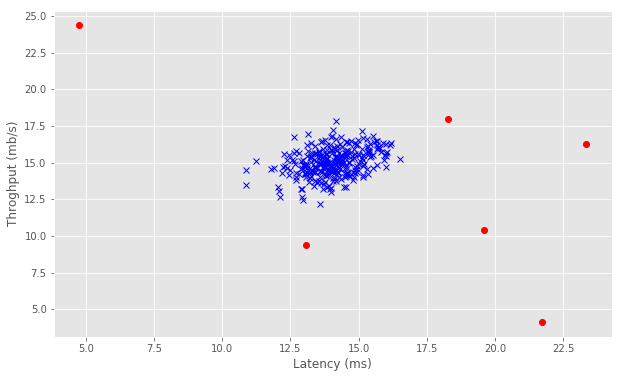

In [288]:
#0 means normal, 1 means abnormal
print(train_df.shape)
normal = train_df[y_pred == 0]
print(normal.shape)
abnormal = train_df[y_pred == 1]
plt.figure(figsize= (10,6))
plt.plot(normal['Latency'], normal['Throughput'], 'bx' )
plt.plot(abnormal['Latency'], abnormal['Throughput'], 'ro' )
plt.xlabel('Latency (ms)')
plt.ylabel('Throghput (mb/s)')
plt.show()

## Using K means

In [289]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=1)
# Fitting the input data
kmeans = kmeans.fit(X_train)


# Getting the cluster labels
labels = kmeans.predict(X_train)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

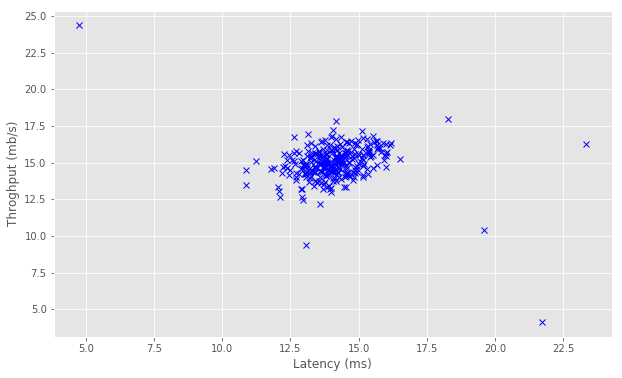

In [290]:
normal = train_df[labels == 0]
abnormal = train_df[labels == 1]
plt.figure(figsize= (10,6))
plt.plot(normal['Latency'], normal['Throughput'], 'bx' )
plt.plot(abnormal['Latency'], abnormal['Throughput'], 'ro' )
plt.xlabel('Latency (ms)')
plt.ylabel('Throghput (mb/s)')
plt.show()

In [291]:
kmeans.cluster_centers_

array([[ 14.01929524,  15.03773094]])

In [ ]:
#dist = np.linalg.norm(X_train, kmeans.cluster_centers_)